In [63]:
import yfinance as yf
import pandas as pd
from fredapi import Fred
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go


In [95]:
rates = pd.read_excel('Low frequency data.xlsx', sheet_name='Fed Interest Rate')
rates.drop(columns=['Time'],inplace=True)
rates.columns = ['date','actual','forecast','previous']
rates

,date,actual,forecast,previous
0,2024-12-18,NaN,NaN,NaN
1,2024-11-07,NaN,NaN,0.050
2,2024-09-18,0.050,0.0525,0.055
3,2024-07-31,0.055,0.0550,0.055
4,2024-06-12,0.055,0.0550,0.055
5,2024-05-01,0.055,0.0550,0.055
6,2024-03-20,0.055,0.0550,0.055
7,2024-01-31,0.055,0.0550,0.055
8,2023-12-13,0.055,0.0550,0.055
9,2023-11-01,0.055,0.0550,0.055


In [139]:
start_date = '2020-01-01'
today_date = datetime.today().strftime('%Y-%m-%d')
date_range = pd.date_range(start=start_date, end=today_date).strftime('%Y-%m-%d')

print(f"the data span from {date_range.min()} up to {date_range.max()}")

the data span from 2020-01-01 up to 2024-11-28


In [140]:
zf = yf.download('ZF=F', start=start_date)

[*********************100%***********************]  1 of 1 completed


In [141]:
zf.reset_index(inplace=True)

In [142]:
zf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,118.531250,118.851562,118.460938,118.664062,118.664062,736650
1,2020-01-03,118.679688,119.109375,118.671875,119.062500,119.062500,868998
2,2020-01-06,119.101562,119.210938,118.898438,118.960938,118.960938,859162
3,2020-01-07,118.953125,119.046875,118.906250,118.921875,118.921875,746424
4,2020-01-08,118.976562,119.523438,118.679688,118.695312,118.695312,1225252


In [143]:
import plotly.express as px

fig = px.line(zf, x="Date", y="Close", title='ZF')
fig.show()

In [144]:
fig = px.line(zf.query('Date > "2024-01-01"'), x="Date", y="Close", title='ZF YTD')
fig.show()

In [145]:
# Create a plotly figure
fig = go.Figure()
zf_ytd = zf.query('Date > "2024-01-01"')
# Add close price as a line plot
fig.add_trace(go.Scatter(x=zf_ytd['Date'], y=zf_ytd['Close'], 
                         mode='lines', name='Close Price'))

# Add volume as a bar plot
fig.add_trace(go.Bar(x=zf_ytd['Date'], y=zf_ytd['Volume'], 
                     name='Volume', opacity=0.5, yaxis='y2'))

# Update layout to include secondary y-axis for volume
fig.update_layout(
    title="Close Price and Volume Over Time",
    xaxis_title="Date",
    yaxis_title="Close Price",
    yaxis2=dict(title="Volume", overlaying="y", side="right", showgrid=False),
    legend=dict(x=0.01, y=0.99)
)

fig.show()

In [124]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics


In [147]:
zf.shape

(1237, 7)

In [125]:
zf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-01-02,108.664062,108.750000,108.250000,108.343750,108.343750,994510
1,2024-01-03,108.382812,108.515625,108.062500,108.468750,108.468750,1278216
2,2024-01-04,108.406250,108.531250,108.054688,108.109375,108.109375,1045833
3,2024-01-05,108.078125,108.359375,107.562500,107.968750,107.968750,1468633
4,2024-01-08,107.984375,108.367188,107.804688,108.203125,108.203125,1248396


In [137]:
m = Prophet()

# Drop the columns
zf_prophet = zf.drop(['Open', 'High', 'Low','Adj Close','Volume'], axis=1)
zf_prophet.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

zf_prophet.head()

,ds,y
0,2023-01-03,108.015625
1,2023-01-04,108.312500
2,2023-01-05,108.140625
3,2023-01-06,109.023438
4,2023-01-09,109.296875


In [127]:
zf_prophet.shape

(230, 2)

12:58:14 - cmdstanpy - INFO - Chain [1] start processing
12:58:15 - cmdstanpy - INFO - Chain [1] done processing


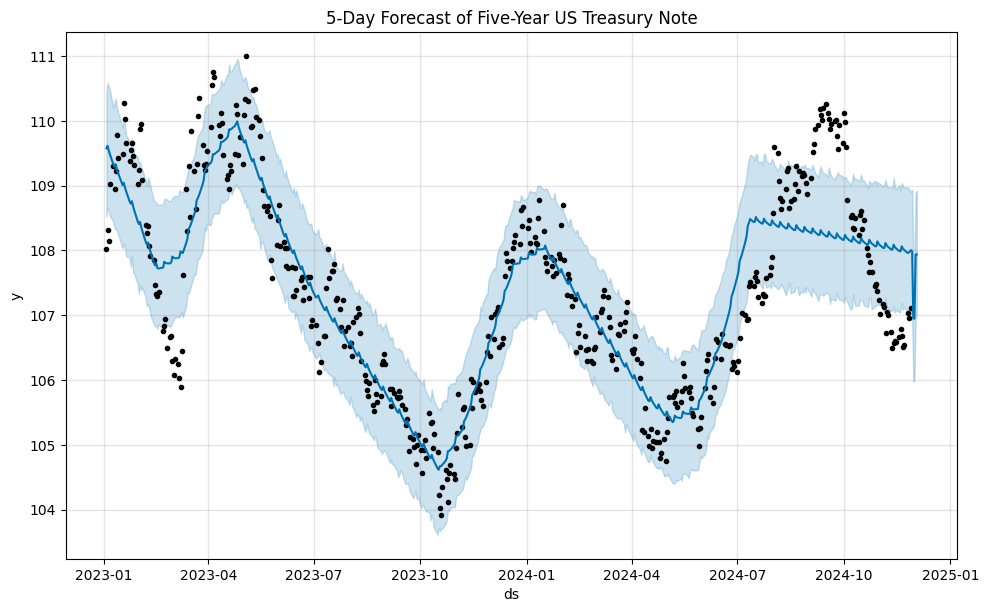

  0%|          | 0/6 [00:00<?, ?it/s]

12:58:15 - cmdstanpy - INFO - Chain [1] start processing
12:58:15 - cmdstanpy - INFO - Chain [1] done processing
12:58:15 - cmdstanpy - INFO - Chain [1] start processing
12:58:15 - cmdstanpy - INFO - Chain [1] done processing
12:58:15 - cmdstanpy - INFO - Chain [1] start processing
12:58:15 - cmdstanpy - INFO - Chain [1] done processing
12:58:15 - cmdstanpy - INFO - Chain [1] start processing
12:58:15 - cmdstanpy - INFO - Chain [1] done processing
12:58:15 - cmdstanpy - INFO - Chain [1] start processing
12:58:16 - cmdstanpy - INFO - Chain [1] done processing
12:58:16 - cmdstanpy - INFO - Chain [1] start processing
12:58:16 - cmdstanpy - INFO - Chain [1] done processing


  horizon       mse      rmse       mae      mape     mdape     smape  \
0  1 days  0.462642  0.680178  0.589458  0.005443  0.005567  0.005424   
1  2 days  0.771078  0.878110  0.795992  0.007381  0.008741  0.007348   
2  3 days  0.522291  0.722697  0.636604  0.005907  0.006062  0.005892   
3  4 days  0.240533  0.490442  0.439134  0.004091  0.003631  0.004098   
4  5 days  0.879785  0.937969  0.844193  0.007850  0.008800  0.007827   

   coverage  
0  0.333333  
1  0.250000  
2  0.400000  
3  0.750000  
4  0.250000  


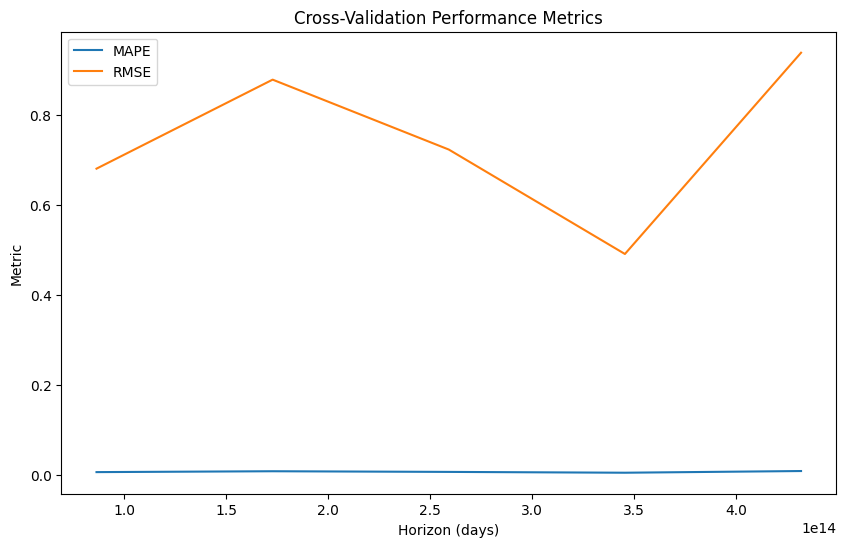

In [149]:
# Step 2: Train the Prophet model
model = Prophet()
model.fit(zf_prophet)

# Step 3: Make future predictions
future = model.make_future_dataframe(periods=5)  # Extend 5 days into the future
forecast = model.predict(future)

# Visualize the forecast
fig = model.plot(forecast)
plt.title("5-Day Forecast of Five-Year US Treasury Note")
plt.show()

# Step 4: Cross-validation
# Perform cross-validation to evaluate the model
df_cv = cross_validation(
    model, 
    initial='365 days',  # First 300 days used for training
    period='60 days',    # Predictions made every 30 days
    horizon='5 days'     # Evaluate predictions 5 days into the future
)

# Step 5: Performance metrics
df_performance = performance_metrics(df_cv)
print(df_performance)

# Visualize performance
fig = plt.figure(figsize=(10, 6))
plt.plot(df_performance['horizon'], df_performance['mape'], label='MAPE')
plt.plot(df_performance['horizon'], df_performance['rmse'], label='RMSE')
plt.legend()
plt.title("Cross-Validation Performance Metrics")
plt.xlabel("Horizon (days)")
plt.ylabel("Metric")
plt.show()

In [157]:

@ColumnHeaders zf

SyntaxError: invalid syntax (1916937342.py, line 1)

In [158]:
zf_prophet

,ds,y
0,2023-01-03,108.015625
1,2023-01-04,108.312500
2,2023-01-05,108.140625
3,2023-01-06,109.023438
4,2023-01-09,109.296875
...,...,...
476,2024-11-21,106.515625
477,2024-11-22,106.539062
478,2024-11-25,107.039062
479,2024-11-26,106.953125


In [159]:
zf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,118.531250,118.851562,118.460938,118.664062,118.664062,736650
1,2020-01-03,118.679688,119.109375,118.671875,119.062500,119.062500,868998
2,2020-01-06,119.101562,119.210938,118.898438,118.960938,118.960938,859162
3,2020-01-07,118.953125,119.046875,118.906250,118.921875,118.921875,746424
4,2020-01-08,118.976562,119.523438,118.679688,118.695312,118.695312,1225252
...,...,...,...,...,...,...,...
1232,2024-11-21,106.640625,106.796875,106.500000,106.515625,106.515625,3791817
1233,2024-11-22,106.531250,106.703125,106.476562,106.539062,106.539062,3650568
1234,2024-11-25,106.671875,107.062500,106.617188,107.039062,107.039062,4717757
1235,2024-11-26,107.015625,107.070312,106.828125,106.953125,106.953125,4717757


In [162]:
zf["week"] = zf["Date"].dt.to_period("W-FRI")
weekly_data = zf.groupby("week").Close.mean().reset_index()

# Rename columns for Prophet compatibility
weekly_data["week"] = weekly_data["week"].dt.end_time  # Convert Period to Timestamp
weekly_data.rename(columns={"week": "ds", "Close": "y"}, inplace=True)
weekly_data

,ds,y
0,2020-01-03 23:59:59.999999999,118.863281
1,2020-01-10 23:59:59.999999999,118.826562
2,2020-01-17 23:59:59.999999999,118.854687
3,2020-01-24 23:59:59.999999999,119.232422
4,2020-01-31 23:59:59.999999999,119.945312
...,...,...
252,2024-11-01 23:59:59.999999999,107.312500
253,2024-11-08 23:59:59.999999999,107.017188
254,2024-11-15 23:59:59.999999999,106.600000
255,2024-11-22 23:59:59.999999999,106.634375


In [163]:
# Step 3: Initialize and fit Prophet model
model = Prophet()
model.fit(weekly_data)

# Step 4: Create future dataframe for one week ahead predictions
future = model.make_future_dataframe(periods=1, freq="W-FRI")  # Weekly frequency
forecast = model.predict(future)

# Step 5: Visualize results
import plotly.graph_objects as go

fig = go.Figure()
# Plot original weekly data
fig.add_trace(go.Scatter(x=weekly_data["ds"], y=weekly_data["y"], mode="lines+markers", name="Weekly Mean"))
# Plot forecasted data
fig.add_trace(go.Scatter(x=forecast["ds"], y=forecast["yhat"], mode="lines", name="Forecast"))
# Add forecast confidence intervals
fig.add_trace(go.Scatter(x=forecast["ds"], y=forecast["yhat_upper"], mode="lines", name="Upper Bound", line=dict(dash="dot")))
fig.add_trace(go.Scatter(x=forecast["ds"], y=forecast["yhat_lower"], mode="lines", name="Lower Bound", line=dict(dash="dot")))

fig.update_layout(title="Weekly Mean Closing Price and Forecast", xaxis_title="Date", yaxis_title="Closing Price")
fig.show()

12:48:32 - cmdstanpy - INFO - Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chain [1] done processing


In [167]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-03 23:59:59.999999999,117.604741,117.637731,119.510326,117.604741,117.604741,0.999929,0.999929,0.999929,0.999929,0.999929,0.999929,0.0,0.0,0.0,118.604670
1,2020-01-10 23:59:59.999999999,118.130340,118.069737,119.945541,118.130340,118.130340,0.862373,0.862373,0.862373,0.862373,0.862373,0.862373,0.0,0.0,0.0,118.992712
2,2020-01-17 23:59:59.999999999,118.655938,118.581649,120.450191,118.655938,118.655938,0.880409,0.880409,0.880409,0.880409,0.880409,0.880409,0.0,0.0,0.0,119.536347
3,2020-01-24 23:59:59.999999999,119.181537,119.164724,121.145720,119.181537,119.181537,0.932456,0.932456,0.932456,0.932456,0.932456,0.932456,0.0,0.0,0.0,120.113993
4,2020-01-31 23:59:59.999999999,119.707136,119.540110,121.391785,119.707136,119.707136,0.797654,0.797654,0.797654,0.797654,0.797654,0.797654,0.0,0.0,0.0,120.504789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2024-11-08 23:59:59.999999999,108.392832,106.826957,108.710422,108.392832,108.392832,-0.604586,-0.604586,-0.604586,-0.604586,-0.604586,-0.604586,0.0,0.0,0.0,107.788245
254,2024-11-15 23:59:59.999999999,108.442929,107.022125,108.884881,108.442929,108.442929,-0.511370,-0.511370,-0.511370,-0.511370,-0.511370,-0.511370,0.0,0.0,0.0,107.931559
255,2024-11-22 23:59:59.999999999,108.493026,107.163263,109.112866,108.493026,108.493026,-0.346295,-0.346295,-0.346295,-0.346295,-0.346295,-0.346295,0.0,0.0,0.0,108.146732
256,2024-11-29 23:59:59.999999999,108.543124,107.597695,109.356924,108.543124,108.543124,-0.027874,-0.027874,-0.027874,-0.027874,-0.027874,-0.027874,0.0,0.0,0.0,108.515250


In [168]:
weekly_data.tail()

,ds,y
252,2024-11-01 23:59:59.999999999,107.312500
253,2024-11-08 23:59:59.999999999,107.017188
254,2024-11-15 23:59:59.999999999,106.600000
255,2024-11-22 23:59:59.999999999,106.634375
256,2024-11-29 23:59:59.999999999,107.111979
